# AI in Biomedicine and Healthcare [BM5020]
# Project : Vessel and tissue recognition during third-space Endoscopy using a deep learning algorithm
## Team Members
- **Pradeep Mundlik, ai21btech11022@iith.ac.in**
- **Naman Chhibbar, ma21btech110xx@iith.ac.in**

#### Link to Github Repository: [Github](https://github.com/NamanChhibbar/BM5020-Project)
#### Link to Paper PPT: [Slides](https://docs.google.com/presentation/d/1uuP4rpO48ZUkxz7x2UBRvn2n522-tvPUc-YlY8JwQa8/edit?usp=sharing)


***This notebook contains the main code for the project. It includes the implementation of various algorithms and functions related to the project along with output to help with our analysis.***

In [41]:
# importing resnest model from timm library
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as Image
import timm
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as T
from torchvision import models
from torchsummary import summary
from torchviz import make_dot
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
import urllib

url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
urllib.request.urlretrieve(url, filename)

('dog.jpg', <http.client.HTTPMessage at 0x7eeadfc79e70>)

In [42]:
# defining the model
class Resnest(nn.Module):
    def __init__(self, model_name='resnest101e', pretrained=True):
        super(Resnest, self).__init__()
        self.model = timm.create_model(model_name, pretrained=pretrained)
        n_features = self.model.fc.in_features
        # self.model.fc = nn.Linear(n_features, 10)
        self.model.fc = nn.Identity(n_features)

    def forward(self, x):
        x = self.model(x)
        print(x.shape)
        x = x.unsqueeze(2)
        x = x.unsqueeze(2)
        print(x.shape)
        return {"out": x}
    
# define the preprocessing function
def preprocess(image):
    image = image.convert('RGB')
    image = np.array(image)
    image = np.transpose(image, (2, 0, 1))
    image = torch.tensor(image, dtype=torch.float32)
    image /= 255.0
    normalise = T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    image = normalise(image)
    return image

In [43]:
# define the model
clf = models.segmentation.deeplabv3.DeepLabHead(2048, 3)
model = models.segmentation.DeepLabV3(backbone=Resnest(), classifier=clf)
print(model)

DeepLabV3(
  (backbone): Resnest(
    (model): ResNet(
      (conv1): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
        (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): ResNestBottleneck(
          (conv1): Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm

In [44]:
# try to visualize the model
image = Image.open('tiger.jpg')
image = preprocess(image)
model.eval()

# predict
with torch.no_grad():
    output = model(image.unsqueeze(0))
    print(output)

torch.Size([1, 2048])
torch.Size([1, 2048, 1, 1])
OrderedDict([('out', tensor([[[[0.0445, 0.0445, 0.0445,  ..., 0.0445, 0.0445, 0.0445],
          [0.0445, 0.0445, 0.0445,  ..., 0.0445, 0.0445, 0.0445],
          [0.0445, 0.0445, 0.0445,  ..., 0.0445, 0.0445, 0.0445],
          ...,
          [0.0445, 0.0445, 0.0445,  ..., 0.0445, 0.0445, 0.0445],
          [0.0445, 0.0445, 0.0445,  ..., 0.0445, 0.0445, 0.0445],
          [0.0445, 0.0445, 0.0445,  ..., 0.0445, 0.0445, 0.0445]],

         [[0.0289, 0.0289, 0.0289,  ..., 0.0289, 0.0289, 0.0289],
          [0.0289, 0.0289, 0.0289,  ..., 0.0289, 0.0289, 0.0289],
          [0.0289, 0.0289, 0.0289,  ..., 0.0289, 0.0289, 0.0289],
          ...,
          [0.0289, 0.0289, 0.0289,  ..., 0.0289, 0.0289, 0.0289],
          [0.0289, 0.0289, 0.0289,  ..., 0.0289, 0.0289, 0.0289],
          [0.0289, 0.0289, 0.0289,  ..., 0.0289, 0.0289, 0.0289]],

         [[0.0038, 0.0038, 0.0038,  ..., 0.0038, 0.0038, 0.0038],
          [0.0038, 0.0038, 0.0038,  .

torch.Size([1, 3, 398, 600])
torch.Size([3, 398, 600])
torch.Size([398, 600, 3])


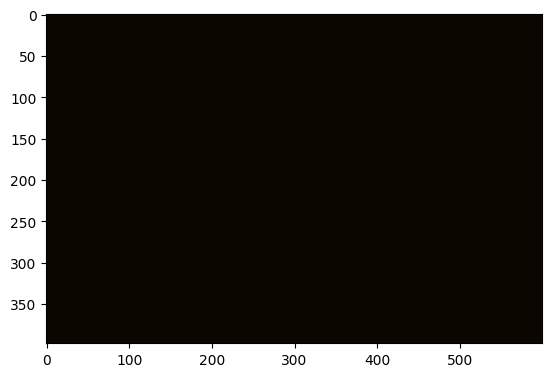

In [45]:
print(output['out'].shape)
print(image.shape)

out_image = output['out'][0]
out_image = np.transpose(out_image, (1, 2, 0))
print(out_image.shape)

plt.imshow(out_image)

In [51]:
# import deeplatv3+ model from torchvision
model = models.segmentation.deeplabv3_resnet101(pretrained=True)

# try to visualize the model
image = Image.open('tiger.jpg')
image = preprocess(image)
model.eval()

# predict
with torch.no_grad():
    output = model(image.unsqueeze(0))
    print(output)
    
print(output['out'].shape)

output = output['out']
print(output.shape)

OrderedDict([('out', tensor([[[[ 6.3394,  6.3394,  6.3394,  ...,  7.2247,  7.2247,  7.2247],
          [ 6.3394,  6.3394,  6.3394,  ...,  7.2247,  7.2247,  7.2247],
          [ 6.3394,  6.3394,  6.3394,  ...,  7.2247,  7.2247,  7.2247],
          ...,
          [ 8.3978,  8.3978,  8.3978,  ...,  8.1682,  8.1682,  8.1682],
          [ 8.3978,  8.3978,  8.3978,  ...,  8.1682,  8.1682,  8.1682],
          [ 8.3978,  8.3978,  8.3978,  ...,  8.1682,  8.1682,  8.1682]],

         [[-0.9694, -0.9694, -0.9694,  ..., -1.7629, -1.7629, -1.7629],
          [-0.9694, -0.9694, -0.9694,  ..., -1.7629, -1.7629, -1.7629],
          [-0.9694, -0.9694, -0.9694,  ..., -1.7629, -1.7629, -1.7629],
          ...,
          [-2.0079, -2.0079, -2.0079,  ..., -1.3214, -1.3214, -1.3214],
          [-2.0079, -2.0079, -2.0079,  ..., -1.3214, -1.3214, -1.3214],
          [-2.0079, -2.0079, -2.0079,  ..., -1.3214, -1.3214, -1.3214]],

         [[-1.6503, -1.6503, -1.6503,  ..., -1.4923, -1.4923, -1.4923],
         

In [52]:
print(model)

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [53]:
import matplotlib.cm as cm
import cv2

def postprocess_output(output, num_classes):
    output_np = output.cpu().numpy().squeeze()
    segmentation_map = np.argmax(output_np, axis=0)
    segmentation_map = cm.tab20(segmentation_map.astype(float) / num_classes)
    return segmentation_map

def overlay_segmentation_mask(image, segmentation_map):

    # convert the image to RGB
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Convert the image to the same data type as the segmentation mask
    segmentation_map = segmentation_map[:,:,:3]
    
    print(type(image), type(segmentation_map))
    image = np.float32(image)
    segmentation_map = np.float32(segmentation_map)
    
    image = cv2.addWeighted(image, 0.9, segmentation_map, 0.3, 0)
    
    return image

def visualize_results(image, segmentation_map):
    
    # if the image is a torch tensor, convert it to a numpy array
    if torch.is_tensor(image):
        image = image.detach().numpy()
        
    # if the segmentation map is a torch tensor, convert it to a numpy array
    if torch.is_tensor(segmentation_map):
        segmentation_map = segmentation_map.detach().numpy()    
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(image)
    axs[0].set_title('Input Image')
    axs[1].imshow(segmentation_map)
    axs[1].set_title('Segmentation Mask')
    axs[2].imshow(overlay_segmentation_mask(image, segmentation_map))
    axs[2].set_title('Overlay')
    plt.show()

In [54]:
print(output.shape)
out_image = postprocess_output(output, 21)
print(out_image.shape)

torch.Size([1, 21, 398, 600])
(398, 600, 4)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'numpy.ndarray'> <class 'numpy.ndarray'>


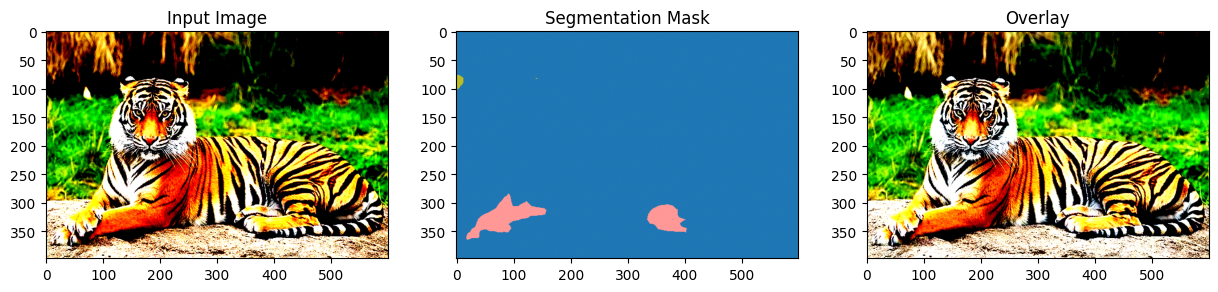

In [55]:
visualize_results(np.transpose(image, (1,2,0)), out_image)